# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
train_df = pd.read_csv("../Data/train.csv")
test_df = pd.read_csv("../Data/train.csv")

train_features_df = pd.read_csv("../Data/train_features_df.csv")
test_features_df = pd.read_csv("../Data/test_features_df.csv")

In [3]:
train_features_df.head()

,OverallQual,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageFinish,YearDiff,YearRemodAdd,1stFlrSF,...,GarageType,OverallCond,LotArea,BsmtFinSF1,LotFrontage,2ndFlrSF,SalePrice,no_garage,is_BsmtFinSF1_0,is_2ndFlrSF_0
0,7,2,6,3,2,1,2,2.472136,87.509776,6.752270,...,5,8,9.041922,706,4.174387,854,208500,0,0,0
1,6,1,3,3,1,3,2,9.135529,86.904443,7.140453,...,5,4,9.169518,978,4.382027,0,181500,0,0,1
2,7,2,6,3,2,3,2,3.291503,87.487429,6.824374,...,5,8,9.328123,486,4.219508,866,223500,0,0,0
3,7,1,2,2,2,4,1,17.078784,86.769364,6.867974,...,2,8,9.164296,216,4.094345,756,140000,0,0,0
4,8,2,6,3,2,3,2,3.656854,87.442719,7.043160,...,5,8,9.565214,655,4.430817,1053,250000,0,0,0


In [4]:
test_features_df.head()

,OverallQual,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageFinish,YearDiff,YearRemodAdd,1stFlrSF,...,BsmtFinType1,GarageType,OverallCond,LotArea,BsmtFinSF1,LotFrontage,2ndFlrSF,no_garage,is_BsmtFinSF1_0,is_2ndFlrSF_0
0,5,1,3,2,1,1,1,12.000000,86.566359,6.797940,...,3,5,6,9.360655,468.0,4.382027,0,0,0,1
1,6,1,3,2,2,1,1,12.422205,86.498588,7.192182,...,4,5,6,9.565704,923.0,4.394449,0,0,0,1
2,5,1,6,3,1,3,3,5.211103,87.397987,6.833032,...,6,5,5,9.534595,791.0,4.304065,701,0,0,0
3,6,1,6,2,2,4,3,4.928203,87.397987,6.830874,...,6,5,6,9.208138,602.0,4.356709,678,0,0,0
4,8,2,6,3,2,1,2,6.485281,87.263654,7.154615,...,4,5,5,8.518193,263.0,3.761200,0,0,0,1


# Linear Regression

## Train Test Split

In [5]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

## Linear Regression Model

In [6]:
lr_model = LinearRegression().fit(X_train, np.log(y_train))
y_hat = lr_model.predict(X_test)

## RMSLE

In [7]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(y_hat)))

0.14414189518443657

## Feature Importances

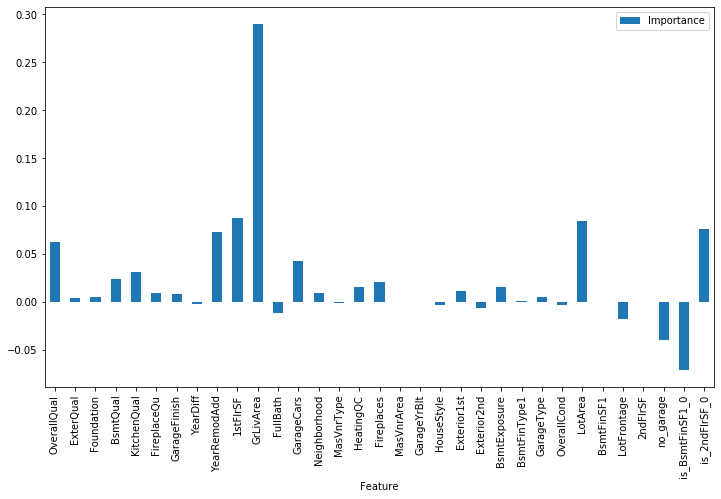

In [8]:
coefs = lr_model.coef_
intercept = lr_model.intercept_

df = pd.DataFrame({"Feature": X.columns, "Importance": coefs})
# df.loc[len(df.index)] = {"Feature": "Intercept", "Importance": intercept}
df.set_index("Feature", inplace = True)

df.plot.bar(figsize = (12, 7))
plt.show()

### Using Important Features Only

**Data**

In [9]:
imp_cols = df[df["Importance"].abs() > 0.05].index
X_train, X_test, y_train, y_test = train_test_split(X[imp_cols].values, 
                                                    y.values, 
                                                    test_size = 0.2, random_state = 42)

**Model**

In [10]:
lr_model = LinearRegression().fit(X_train, np.log(y_train))
y_hat = lr_model.predict(X_test)

**RMSLE**

In [11]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(y_hat)))

0.16220432586722572

# Ridge Regression

## Train Test Split

In [12]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Ridge Regression Model

In [13]:
ridge_model = Ridge(alpha = 1.0).fit(X_train, np.log(y_train))
ridge_preds = ridge_model.predict(X_test)

## RMSLE

In [14]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(ridge_preds)))

0.1440169362714755

## Optimizing Alpha

**Optimizing over large range of values**

0.14395265849217595 4


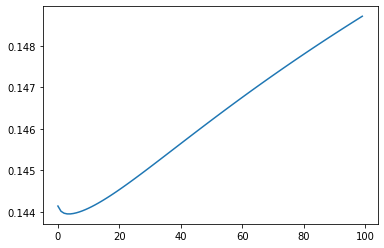

In [15]:
rmsle = []
for a in range(0, 100):
    ridge_model = Ridge(alpha = a).fit(X_train, np.log(y_train))
    ridge_preds = ridge_model.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(ridge_preds))))
    
print(np.min(rmsle), np.argmin(rmsle))
plt.plot(rmsle)
plt.show()

**Optimizing Locally**

0.14395135754145783 518 3.517999999999943


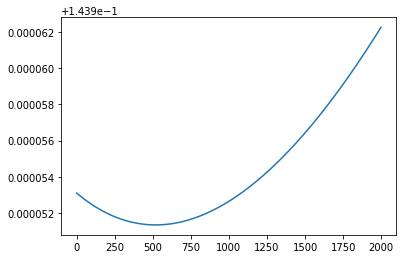

In [16]:
rmsle = []
alphas = np.arange(3, 5, 0.001)
for a in alphas:
    ridge_model = Ridge(alpha = a).fit(X_train, np.log(y_train))
    ridge_preds = ridge_model.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(ridge_preds))))
    
print(np.min(rmsle), np.argmin(rmsle), alphas[np.argmin(rmsle)])
plt.plot(rmsle)
plt.show()

**Final Model**

In [17]:
optimal_alpha = 4
ridge_model = Ridge(alpha = a).fit(X_train, np.log(y_train))
ridge_preds = ridge_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(ridge_preds)))

0.14396224710946431

## Feature Importances

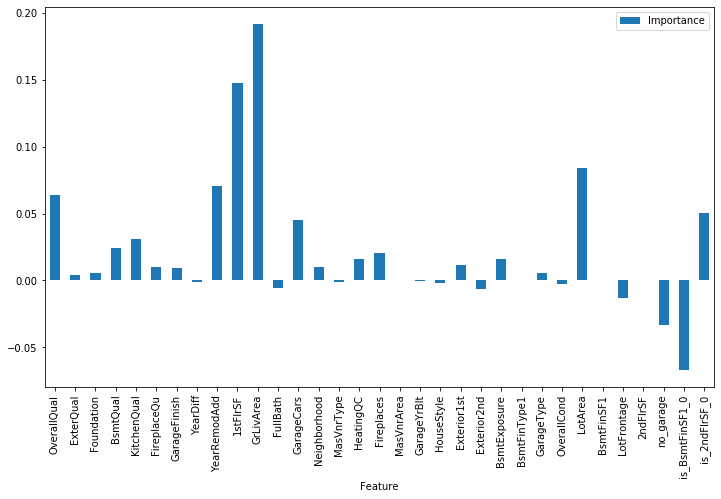

In [18]:
coefs = ridge_model.coef_
intercept = ridge_model.intercept_

df = pd.DataFrame({"Feature": X.columns, "Importance": coefs})
# df.loc[len(df.index)] = {"Feature": "Intercept", "Importance": intercept}
df.set_index("Feature", inplace = True)

df.plot.bar(figsize = (12, 7))
plt.show()

### Using Important Features Only

**Data**

In [19]:
imp_cols = df[df["Importance"].abs() > 0.05].index
X_train, X_test, y_train, y_test = train_test_split(X[imp_cols].values, 
                                                    y.values, 
                                                    test_size = 0.2, random_state = 42)

**Model**

In [20]:
ridge_model = Ridge(alpha = 4.0).fit(X_train, np.log(y_train))
y_hat = ridge_model.predict(X_test)

**RMSLE**

In [21]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(y_hat)))

0.16212037524142342

## Submission

**Data and Model**

In [22]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]
full_ridge_model = Ridge(alpha = 4.0).fit(X.values, np.log(y.values))
full_ridge_preds = full_ridge_model.predict(test_features_df.values)

**Sub File**

In [23]:
sub1_ridge_df = pd.read_csv("../Data/sample_submission.csv")
sub1_ridge_df["SalePrice"] = np.exp(full_ridge_preds)
sub1_ridge_df.to_csv("sub1_ridge_df.csv", index = False)

# Lasso Regression

## Train Test Split

In [24]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Lasso Regression Model

In [25]:
lasso_model = Lasso(alpha = 1.0).fit(X_train, np.log(y_train))
lasso_preds = lasso_model.predict(X_test)

## RMSLE

In [26]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(lasso_preds)))

0.29033744925092086

# ElasticNet

## Train Test Split

In [27]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## ElasticNet Regression Model

In [28]:
en_model = ElasticNet(alpha = 1.0, l1_ratio = 0.5).fit(X_train, np.log(y_train))
en_preds = en_model.predict(X_test)

## RMSLE

In [29]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(en_preds)))

0.2537312835164903

## GridSearchCV optimization

**Building Grid**

In [30]:
model = ElasticNet()

grid = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    "l1_ratio": np.arange(0, 1, 0.01)
}

search = GridSearchCV(model, grid, scoring='neg_mean_squared_log_error', cv=3, n_jobs=-1)

**Fitting All Models**

In [31]:
search_results = search.fit(X_train, np.log(y_train))

**Best Model Parameters**

In [32]:
search_results.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.02,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

**Fitting Best ElasticNet Model**

In [33]:
best_en_model = ElasticNet(alpha = 0.01, l1_ratio = 0.02).fit(X_train, np.log(y_train))
best_en_preds = best_en_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(best_en_preds)))

0.14401377852242062